In [ ]:
#pip install tensorflow

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
df = pd.read_csv("Flight_Delay.csv")

In [3]:
import datetime
#df['Flight_Date'] = pd.to_datetime(df['Flight_Date'])
df['Day'] = pd.to_datetime(df['Flight_Date']).dt.day_name()
df = df.drop(columns=['Flight_Date'])

In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert Cancelled_Flag to binary numerical format (0 for not cancelled, 1 for cancelled)
df['Cancelled_Flag'] = df['Cancelled_Flag'].apply(lambda x: 0 if x == 'Not Cancelled' else 1)

# Create a dictionary to store label encoders for each column
label_encoders = {}

# Encode categorical variables using LabelEncoder
categorical_columns = ['Airline_Name', 'Origin_City', 'Destination_City', 'Cancellation_Code']
for col in categorical_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder

In [5]:
# Convert time columns into numerical representation (e.g., seconds since midnight)
df['Scheduled_Departure_Hour'] = df['Scheduled_Departure_Time'].apply(lambda x: int(x.split(':')[0]))
df['Scheduled_Departure_Minute'] = df['Scheduled_Departure_Time'].apply(lambda x: int(x.split(':')[1]))

# Drop the original 'Scheduled_Departure_Time' column
df.drop(columns=['Scheduled_Departure_Time'], inplace=True)



# Repeat the above process for other time columns

df['Actual_Departure_Hour'] = df['Actual_Departure_Time'].apply(lambda x: int(x.split(':')[0]))
df['Actual_Departure_Minute'] = df['Actual_Departure_Time'].apply(lambda x: int(x.split(':')[1]))

df.drop(columns=['Actual_Departure_Time'], inplace=True)



df['Scheduled_Arrival_Hour'] = df['Scheduled_Arrival_Time'].apply(lambda x: int(x.split(':')[0]))
df['Scheduled_Arrival_Minute'] = df['Scheduled_Arrival_Time'].apply(lambda x: int(x.split(':')[1]))

df.drop(columns=['Scheduled_Arrival_Time'], inplace=True)



df['Actual_Arrival_Hour'] = df['Actual_Arrival_Time'].apply(lambda x: int(x.split(':')[0]))
df['Actual_Arrival_Minute'] = df['Actual_Arrival_Time'].apply(lambda x: int(x.split(':')[1]))

df.drop(columns=['Actual_Arrival_Time'], inplace=True)



df['Carrier_Delay_HH'] = df['Carrier_Delay_HH_MM'].apply(lambda x: int(x.split(':')[0]))
df['Carrier_Delay_MM'] = df['Carrier_Delay_HH_MM'].apply(lambda x: int(x.split(':')[1]))
#df['Carrier_Delay_SS'] = df['Carrier_Delay_HH_MM'].apply(lambda x: int(x.split(':')[2]))

df.drop(columns=['Carrier_Delay_HH_MM'], inplace=True)



df['Weather_Delay_HH'] = df['Weather_Delay_HH_MM'].apply(lambda x: int(x.split(':')[0]))
df['Weather_Delay_MM'] = df['Weather_Delay_HH_MM'].apply(lambda x: int(x.split(':')[1]))

df.drop(columns=['Weather_Delay_HH_MM'], inplace=True)



df['NAS_Delay_HH'] = df['NAS_Delay_HH_MM'].apply(lambda x: int(x.split(':')[0]))
df['NAS_Delay_MM'] = df['NAS_Delay_HH_MM'].apply(lambda x: int(x.split(':')[1]))

df.drop(columns=['NAS_Delay_HH_MM'], inplace=True)



df['Security_Delay_HH'] = df['Security_Delay_HH_MM'].apply(lambda x: int(x.split(':')[0]))
df['Security_Delay_MM'] = df['Security_Delay_HH_MM'].apply(lambda x: int(x.split(':')[1]))

df.drop(columns=['Security_Delay_HH_MM'], inplace=True)



df['Late_Aircraft_Delay_HH'] = df['Late_Aircraft_Delay_HH_MM'].apply(lambda x: int(x.split(':')[0]))
df['Late_Aircraft_Delay_MM'] = df['Late_Aircraft_Delay_HH_MM'].apply(lambda x: int(x.split(':')[1]))

df.drop(columns=['Late_Aircraft_Delay_HH_MM'], inplace=True)

In [6]:
df['Diverted_Flag'] = df['Diverted_Flag'].apply(lambda x: 0 if x == 'Not Diverted' else 1)

In [7]:
# Define a mapping dictionary for days of the week
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Map the days of the week to numerical values
df['Day'] = df['Day'].map(day_mapping)

In [8]:
df.head()

,Airline_Name,Origin_City,Destination_City,Departure_Delay_Minutes,Arrival_Delay_Minutes,Cancelled_Flag,Cancellation_Code,Diverted_Flag,Scheduled_Elapsed_Time_Minutes,Actual_Elapsed_Time_Minutes,...,Carrier_Delay_HH,Carrier_Delay_MM,Weather_Delay_HH,Weather_Delay_MM,NAS_Delay_HH,NAS_Delay_MM,Security_Delay_HH,Security_Delay_MM,Late_Aircraft_Delay_HH,Late_Aircraft_Delay_MM
0,10,114,41,-7.0,64.0,0,2,0,184.0,255.0,...,26,4,4,44,1,4,1,38,3,37
1,2,185,213,-6.0,-5.0,0,2,0,282.0,283.0,...,30,38,14,28,2,50,4,39,8,23
2,0,309,261,-8.0,-23.0,0,2,0,279.0,264.0,...,8,27,16,37,3,22,4,52,1,49
3,4,234,279,-10.0,-19.0,0,2,0,87.0,78.0,...,44,52,4,48,4,39,2,49,10,38
4,0,197,310,101.0,140.0,0,2,0,178.0,217.0,...,28,40,21,38,0,39,4,13,1,41


In [9]:
X = df.drop(columns=['Cancelled_Flag'],axis=1)

In [10]:
X.head()

,Airline_Name,Origin_City,Destination_City,Departure_Delay_Minutes,Arrival_Delay_Minutes,Cancellation_Code,Diverted_Flag,Scheduled_Elapsed_Time_Minutes,Actual_Elapsed_Time_Minutes,Day,...,Carrier_Delay_HH,Carrier_Delay_MM,Weather_Delay_HH,Weather_Delay_MM,NAS_Delay_HH,NAS_Delay_MM,Security_Delay_HH,Security_Delay_MM,Late_Aircraft_Delay_HH,Late_Aircraft_Delay_MM
0,10,114,41,-7.0,64.0,2,0,184.0,255.0,2,...,26,4,4,44,1,4,1,38,3,37
1,2,185,213,-6.0,-5.0,2,0,282.0,283.0,6,...,30,38,14,28,2,50,4,39,8,23
2,0,309,261,-8.0,-23.0,2,0,279.0,264.0,5,...,8,27,16,37,3,22,4,52,1,49
3,4,234,279,-10.0,-19.0,2,0,87.0,78.0,7,...,44,52,4,48,4,39,2,49,10,38
4,0,197,310,101.0,140.0,2,0,178.0,217.0,2,...,28,40,21,38,0,39,4,13,1,41


In [11]:
y = df['Cancelled_Flag']

In [12]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    1
49998    0
49999    0
Name: Cancelled_Flag, Length: 50000, dtype: int64

Text(0, 0.5, 'Frequency')

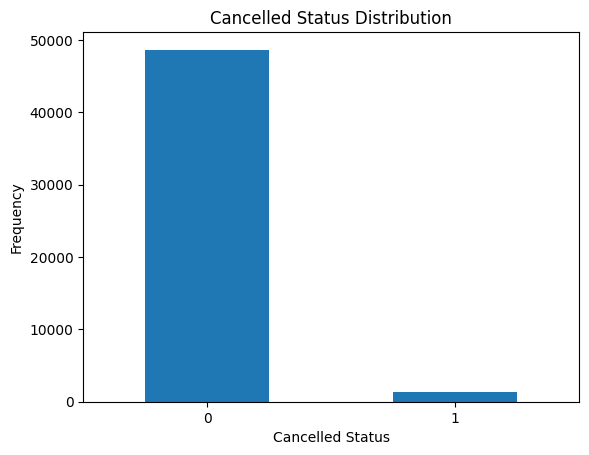

In [13]:
import matplotlib.pyplot as plt

check_classes = pd.value_counts(df['Cancelled_Flag'], sort = True)

check_classes.plot(kind = 'bar', rot=0)

plt.title("Cancelled Status Distribution")

plt.xlabel("Cancelled Status")

plt.ylabel("Frequency")

In [14]:
## Get the Not Cancelled and Cancelled datasets

Not_Cancelled = df[df['Cancelled_Flag']==0]

Cancelled = df[df['Cancelled_Flag']==1]

In [15]:
print(Not_Cancelled.shape,Cancelled.shape)

(48670, 29) (1330, 29)


In [16]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

In [17]:
print(df.dtypes)

Airline_Name                        int64
Origin_City                         int64
Destination_City                    int64
Departure_Delay_Minutes           float64
Arrival_Delay_Minutes             float64
Cancelled_Flag                      int64
Cancellation_Code                   int64
Diverted_Flag                       int64
Scheduled_Elapsed_Time_Minutes    float64
Actual_Elapsed_Time_Minutes       float64
Day                                 int64
Scheduled_Departure_Hour            int64
Scheduled_Departure_Minute          int64
Actual_Departure_Hour               int64
Actual_Departure_Minute             int64
Scheduled_Arrival_Hour              int64
Scheduled_Arrival_Minute            int64
Actual_Arrival_Hour                 int64
Actual_Arrival_Minute               int64
Carrier_Delay_HH                    int64
Carrier_Delay_MM                    int64
Weather_Delay_HH                    int64
Weather_Delay_MM                    int64
NAS_Delay_HH                      

In [138]:
# # Convert relevant columns to datetime data type
# df['Scheduled_Departure_Time'] = pd.to_datetime(df['Scheduled_Departure_Time'])
# df['Actual_Departure_Time'] = pd.to_datetime(df['Actual_Departure_Time'])
# df['Scheduled_Arrival_Time'] = pd.to_datetime(df['Scheduled_Arrival_Time'])
# df['Actual_Arrival_Time'] = pd.to_datetime(df['Actual_Arrival_Time'])

In [18]:
df.head()

,Airline_Name,Origin_City,Destination_City,Departure_Delay_Minutes,Arrival_Delay_Minutes,Cancelled_Flag,Cancellation_Code,Diverted_Flag,Scheduled_Elapsed_Time_Minutes,Actual_Elapsed_Time_Minutes,...,Carrier_Delay_HH,Carrier_Delay_MM,Weather_Delay_HH,Weather_Delay_MM,NAS_Delay_HH,NAS_Delay_MM,Security_Delay_HH,Security_Delay_MM,Late_Aircraft_Delay_HH,Late_Aircraft_Delay_MM
0,10,114,41,-7.0,64.0,0,2,0,184.0,255.0,...,26,4,4,44,1,4,1,38,3,37
1,2,185,213,-6.0,-5.0,0,2,0,282.0,283.0,...,30,38,14,28,2,50,4,39,8,23
2,0,309,261,-8.0,-23.0,0,2,0,279.0,264.0,...,8,27,16,37,3,22,4,52,1,49
3,4,234,279,-10.0,-19.0,0,2,0,87.0,78.0,...,44,52,4,48,4,39,2,49,10,38
4,0,197,310,101.0,140.0,0,2,0,178.0,217.0,...,28,40,21,38,0,39,4,13,1,41


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Airline_Name                    50000 non-null  int64  
 1   Origin_City                     50000 non-null  int64  
 2   Destination_City                50000 non-null  int64  
 3   Departure_Delay_Minutes         50000 non-null  float64
 4   Arrival_Delay_Minutes           50000 non-null  float64
 5   Cancelled_Flag                  50000 non-null  int64  
 6   Cancellation_Code               50000 non-null  int64  
 7   Diverted_Flag                   50000 non-null  int64  
 8   Scheduled_Elapsed_Time_Minutes  50000 non-null  float64
 9   Actual_Elapsed_Time_Minutes     50000 non-null  float64
 10  Day                             50000 non-null  int64  
 11  Scheduled_Departure_Hour        50000 non-null  int64  
 12  Scheduled_Departure_Minute      

In [20]:
df.head()

,Airline_Name,Origin_City,Destination_City,Departure_Delay_Minutes,Arrival_Delay_Minutes,Cancelled_Flag,Cancellation_Code,Diverted_Flag,Scheduled_Elapsed_Time_Minutes,Actual_Elapsed_Time_Minutes,...,Carrier_Delay_HH,Carrier_Delay_MM,Weather_Delay_HH,Weather_Delay_MM,NAS_Delay_HH,NAS_Delay_MM,Security_Delay_HH,Security_Delay_MM,Late_Aircraft_Delay_HH,Late_Aircraft_Delay_MM
0,10,114,41,-7.0,64.0,0,2,0,184.0,255.0,...,26,4,4,44,1,4,1,38,3,37
1,2,185,213,-6.0,-5.0,0,2,0,282.0,283.0,...,30,38,14,28,2,50,4,39,8,23
2,0,309,261,-8.0,-23.0,0,2,0,279.0,264.0,...,8,27,16,37,3,22,4,52,1,49
3,4,234,279,-10.0,-19.0,0,2,0,87.0,78.0,...,44,52,4,48,4,39,2,49,10,38
4,0,197,310,101.0,140.0,0,2,0,178.0,217.0,...,28,40,21,38,0,39,4,13,1,41


In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [22]:
print(X_resampled.shape,y_resampled.shape)

(97340, 28) (97340,)


In [23]:
X_resampled.head()

,Airline_Name,Origin_City,Destination_City,Departure_Delay_Minutes,Arrival_Delay_Minutes,Cancellation_Code,Diverted_Flag,Scheduled_Elapsed_Time_Minutes,Actual_Elapsed_Time_Minutes,Day,...,Carrier_Delay_HH,Carrier_Delay_MM,Weather_Delay_HH,Weather_Delay_MM,NAS_Delay_HH,NAS_Delay_MM,Security_Delay_HH,Security_Delay_MM,Late_Aircraft_Delay_HH,Late_Aircraft_Delay_MM
0,10,114,41,-7.0,64.0,2,0,184.0,255.0,2,...,26,4,4,44,1,4,1,38,3,37
1,2,185,213,-6.0,-5.0,2,0,282.0,283.0,6,...,30,38,14,28,2,50,4,39,8,23
2,0,309,261,-8.0,-23.0,2,0,279.0,264.0,5,...,8,27,16,37,3,22,4,52,1,49
3,4,234,279,-10.0,-19.0,2,0,87.0,78.0,7,...,44,52,4,48,4,39,2,49,10,38
4,0,197,310,101.0,140.0,2,0,178.0,217.0,2,...,28,40,21,38,0,39,4,13,1,41


In [24]:
y_resampled.head()

0    0
1    0
2    0
3    0
4    0
Name: Cancelled_Flag, dtype: int64

In [282]:
# # Convert label encoded columns back to their original values

# original_values_1 = label_encoders['Airline_Name'].inverse_transform(X_resampled['Airline_Name'])
# X_resampled['Airline_Name'] = original_values_1

# original_values_2 = label_encoders['Origin_City'].inverse_transform(X_resampled['Origin_City'])
# X_resampled['Origin_City'] = original_values_2

# original_values_3 = label_encoders['Destination_City'].inverse_transform(X_resampled['Destination_City'])
# X_resampled['Destination_City'] = original_values_3

# original_values_4 = label_encoders['Cancellation_Code'].inverse_transform(X_resampled['Cancellation_Code'])
# X_resampled['Cancellation_Code'] = original_values_4

In [284]:
# X_resampled['Diverted_Flag'] = X_resampled['Diverted_Flag'].apply(lambda x: 'Not Diverted' if x == 0 else 'Diverted')

In [285]:
# # Define the reverse mapping dictionary for days of the week
# day_mapping_reverse = {
#     1: 'Monday',
#     2: 'Tuesday',
#     3: 'Wednesday',
#     4: 'Thursday',
#     5: 'Friday',
#     6: 'Saturday',
#     7: 'Sunday'
# }


# # map() function to replace numerical values with their corresponding string values
# X_resampled['Day'] = X_resampled['Day'].map(day_mapping_reverse)


In [25]:
X_resampled.head()

,Airline_Name,Origin_City,Destination_City,Departure_Delay_Minutes,Arrival_Delay_Minutes,Cancellation_Code,Diverted_Flag,Scheduled_Elapsed_Time_Minutes,Actual_Elapsed_Time_Minutes,Day,...,Carrier_Delay_HH,Carrier_Delay_MM,Weather_Delay_HH,Weather_Delay_MM,NAS_Delay_HH,NAS_Delay_MM,Security_Delay_HH,Security_Delay_MM,Late_Aircraft_Delay_HH,Late_Aircraft_Delay_MM
0,10,114,41,-7.0,64.0,2,0,184.0,255.0,2,...,26,4,4,44,1,4,1,38,3,37
1,2,185,213,-6.0,-5.0,2,0,282.0,283.0,6,...,30,38,14,28,2,50,4,39,8,23
2,0,309,261,-8.0,-23.0,2,0,279.0,264.0,5,...,8,27,16,37,3,22,4,52,1,49
3,4,234,279,-10.0,-19.0,2,0,87.0,78.0,7,...,44,52,4,48,4,39,2,49,10,38
4,0,197,310,101.0,140.0,2,0,178.0,217.0,2,...,28,40,21,38,0,39,4,13,1,41


In [26]:
print(X_resampled.shape,y_resampled.shape)

(97340, 28) (97340,)


In [27]:
# y_resampled = y_resampled.apply(lambda x: 'Not Cancelled' if x == 0 else 'Cancelled')

In [28]:
y_resampled.head()

0    0
1    0
2    0
3    0
4    0
Name: Cancelled_Flag, dtype: int64

In [29]:
print(X_resampled.shape,y_resampled.shape)

(97340, 28) (97340,)


In [30]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras import regularizers

In [34]:
### No of classes
num_labels=1

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

In [69]:
model=Sequential()
###first layer
model.add(Dense(20,kernel_regularizer=regularizers.l2(0.01),input_shape=(28,)))
model.add(Activation('leaky_relu'))
model.add(Dropout(0.3))
###second layer
model.add(Dense(10,kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('leaky_relu'))
model.add(Dropout(0.3))
###third layer
model.add(Dense(3,kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('leaky_relu'))
model.add(Dropout(0.3))

###final layer
model.add(Dense(num_labels))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 20)                580       
                                                                 
 activation_39 (Activation)  (None, 20)                0         
                                                                 
 dropout_30 (Dropout)        (None, 20)                0         
                                                                 
 dense_40 (Dense)            (None, 10)                210       
                                                                 
 activation_40 (Activation)  (None, 10)                0         
                                                                 
 dropout_31 (Dropout)        (None, 10)                0         
                                                                 
 dense_41 (Dense)            (None, 3)               

In [77]:
num_epochs = 10
num_batch_size = 32

In [37]:
y_train.head()

74049    1
44030    0
87123    1
18818    0
35155    0
Name: Cancelled_Flag, dtype: int64

In [78]:
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
2130/2130 [==============================] - 6s 3ms/step - loss: 0.1442 - accuracy: 0.9604 - val_loss: 0.0840 - val_accuracy: 0.9894
Epoch 2/10
2130/2130 [==============================] - 5s 2ms/step - loss: 0.1429 - accuracy: 0.9608 - val_loss: 0.1282 - val_accuracy: 0.9590
Epoch 3/10
2130/2130 [==============================] - 6s 3ms/step - loss: 0.1465 - accuracy: 0.9598 - val_loss: 0.1035 - val_accuracy: 0.9900
Epoch 4/10
2130/2130 [==============================] - 5s 2ms/step - loss: 0.1417 - accuracy: 0.9611 - val_loss: 0.0995 - val_accuracy: 0.9887
Epoch 5/10
2130/2130 [==============================] - 5s 2ms/step - loss: 0.1453 - accuracy: 0.9603 - val_loss: 0.0822 - val_accuracy: 0.9939
Epoch 6/10
2130/2130 [==============================] - 5s 3ms/step - loss: 0.1420 - accuracy: 0.9609 - val_loss: 0.0721 - val_accuracy: 0.9954
Epoch 7/10
2130/2130 [==============================] - 5s 2ms/step - loss: 0.1471 - accuracy: 0.9593 - val_loss: 0.0823 - val_accuracy: